# Check the behvaior of the old simulations

This code allows you to check the behavior of you old simulations. 
* Executing the first cell lets you choose a folder (when you see the *DATA*, *IN*, *OUT* folder, you can click **OK**.

* Executing the second cell will print the graphs you want. It also saves an image of the order parameter graph inside the folder for you to use.

In [1]:
%matplotlib inline
import numpy as np
import os
import re
from scripts import utils
from tkinter import filedialog
from tkinter import *
root = Tk()
root.withdraw()
folder_name = filedialog.askdirectory()

import math
import json
filename = "green"
save_filename = os.path.join(folder_name,"order_graph")
Composante = 6
graph = np.zeros(1)


green = utils.load_matsubara_json(dataFolder = os.path.join(folder_name,"DATA"),
                               measurement_name="green",
                               components=["mphi","pphi"],
                               converged_from=None)

with open(os.path.join(folder_name,"IN/params1.json")) as f:
    beta = json.load(f)["beta"]
graph = 2*np.sum((green[:,:,0]-green[:,:,1]).real/2,axis=1)/beta

N = 2*np.loadtxt(os.path.join(folder_name,"DATA/N.dat")) + 4*np.loadtxt(os.path.join(folder_name ,"DATA/pn.dat"))
Sign = np.loadtxt(os.path.join(folder_name,"DATA/sign.dat"))
D =  np.loadtxt(os.path.join(folder_name,"DATA/D.dat"))
print(folder_name)

/home/kown2801/Documents/Programmes/ImpuritySolver/Corrected Versions/Supra/Results/AllData/Only_Supra/Hysteresis/Supra/9.25/ep9.25_beta60_mu11.97_U12_tpd1.5_tppp1


<IPython.core.display.Javascript object>


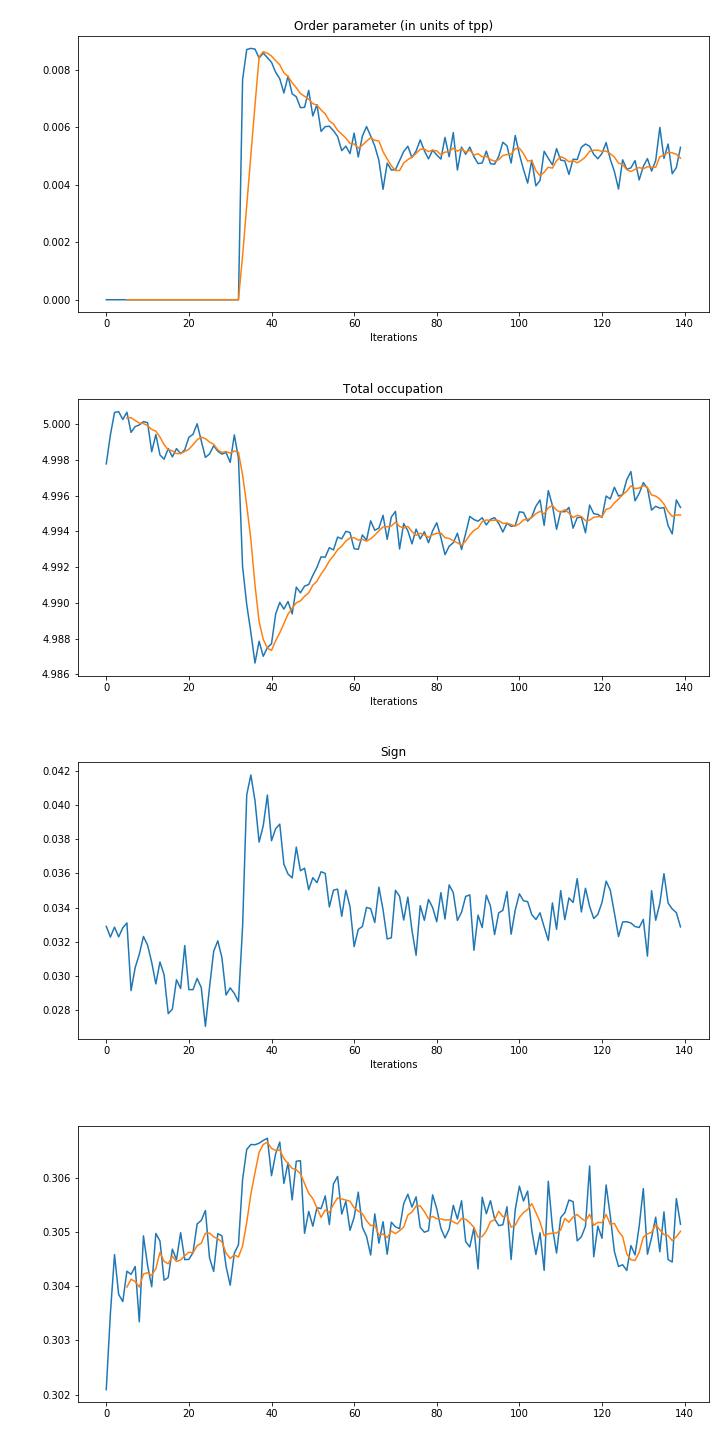

(140,)


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas
fig,ax = plt.subplots(4,figsize=(10,4*5))
mean_over = 5

def print_and_mean(data,ax):
    n = len(data)
    X = np.linspace(mean_over,n-1,n-mean_over)
    panda_data = pandas.DataFrame(data=data)
    ax.plot(data,label="Raw Data")
    ax.plot(X,panda_data.rolling(mean_over).mean().values.flatten()[mean_over:],label="Rolling mean")

print(graph.shape)
print_and_mean(graph,ax[0])  

#ax[0].plot(graph,"b")
ax[0].set_xlabel('Iterations')
ax[0].set_title('Order parameter (in units of tpp)')
ax[1].set_xlabel('Iterations')
ax[1].set_title('Total occupation')
ax[2].set_xlabel('Iterations')
ax[2].set_title('Sign')
print_and_mean(N[:,1],ax[1]) 
ax[2].plot(Sign[:,1])
print_and_mean(D[:,1],ax[3])
plt.savefig(os.path.join(folder_name,'convergence.png'),bbox_inches="tight",pad_inches=0.5, dpi=150)
plt.tight_layout()
plt.show()